In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pickle
import os

SavingFolder = os.path.join(os.getcwd(), 'SavingFolder')

# Tests in 2D lattices

In [2]:
def apply_Tooms_rule(spins, p=0, q=0):
    #The line below applies the NEC majority vote in Toom's rule
    new_spins = ((spins + np.roll(spins, 1, axis=0) + np.roll(spins, -1, axis=1)) > 1).astype(np.uint8) 
    if p>0:
        if q>0:
            new_spins = (new_spins + np.random.binomial(new_spins, p).astype(np.uint8) + np.random.binomial(1-new_spins, q).astype(np.uint8))%2
        else:
            new_spins = (new_spins + np.random.binomial(new_spins, p).astype(np.uint8)) % 2
    elif q>0:
        new_spins = (new_spins + np.random.binomial(1-new_spins, q).astype(np.uint8))%2
    return new_spins

def get_pq_from_Th(T, h):
    return T*(1.+h)*0.5, T*(1.-h)*0.5 

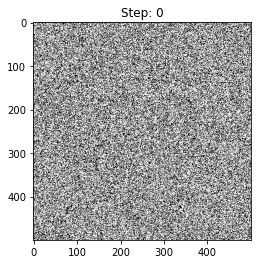

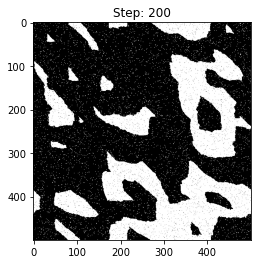

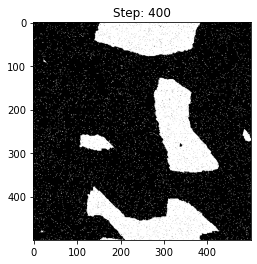

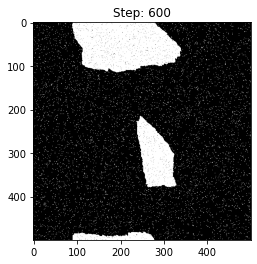

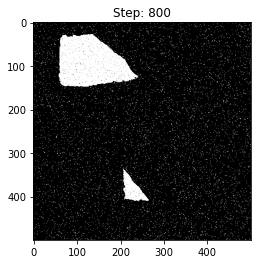

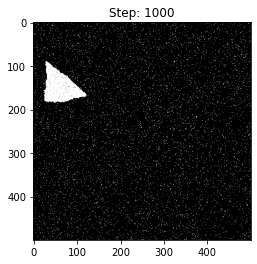

In [6]:
L = 500

T = 0.05
h = -0.1

p, q = get_pq_from_Th(T, h)


spins = np.random.binomial(1, 0.5, (L, L)).astype(np.uint8)

num_steps = 1000

plot_every = 200

for step_ix in range(num_steps):
    
    if (step_ix % plot_every == 0):
        plt.imshow(spins, cmap='Greys')
        plt.title('Step: '+str(step_ix))
        plt.show()

    spins = apply_Tooms_rule(spins, p, q)
    
plt.imshow(spins, cmap='Greys')
plt.title('Step: '+str(num_steps))
plt.show()

# Tests phase stability

In [47]:
def check_Tooms_phase_stable(T, h , L,
                            max_num_steps = 2000,
                            steps_for_phase = 100,
                            check_phase_steps = 10,
                            thermalize_steps = 200,
                            init_bias = 0.6,
                            phase_thresh= 0.7,
                            print_spins = False
                            ):
    p, q = get_pq_from_Th(T, h)
    
    if np.random.binomial(1, 0.5)>0.5:
    
        bias0 = init_bias
    else:
        bias0 = 1 - init_bias
        
    in_phase = False
    phase_sign = 0
    
    
    spins = np.random.binomial(1, bias0, (L, L)).astype(np.uint8)
    
    tot_runs = 0
    
    if print_spins:
        plt.imshow(spins, cmap='Greys')
        plt.title('Step: '+str(tot_runs))
        plt.show()
        

    
    while (tot_runs<max_num_steps):
        
        for _ in range(thermalize_steps):

            spins = apply_Tooms_rule(spins, p, q)
    
        tot_runs += thermalize_steps
        
        if print_spins:
            plt.imshow(spins, cmap='Greys')
            plt.title('Step: '+str(tot_runs))
            plt.show()
        
        
        avg_spin = (np.mean(spins) - 0.5)*2
        
        if np.abs(avg_spin)>phase_thresh:
            in_phase = True
            phase_sign = np.sign(avg_spin)
            start_phase_step = tot_runs
            
        if in_phase:
            
            while (in_phase) and (tot_runs <= (start_phase_step + steps_for_phase)):
                
                
                for _ in range(check_phase_steps):
                    spins = apply_Tooms_rule(spins, p, q)
                    
                tot_runs += check_phase_steps
                
                temp_avg_spin = (np.mean(spins) - 0.5)*2
                temp_phase_sign = np.sign(temp_avg_spin)

                if (np.abs(temp_avg_spin)<=phase_thresh) or (temp_phase_sign!=phase_sign):
                    in_phase = False
                    
            if in_phase:
                
                if print_spins:
                    plt.imshow(spins, cmap='Greys')
                    plt.title('Step: '+str(tot_runs))
                    plt.show()
                
                return in_phase, temp_avg_spin, temp_phase_sign, start_phase_step
    
    return False, avg_spin, 0, tot_runs

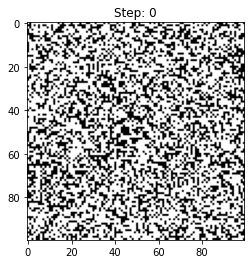

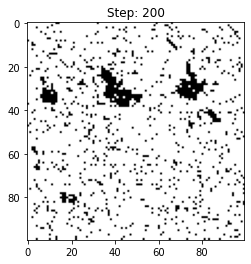

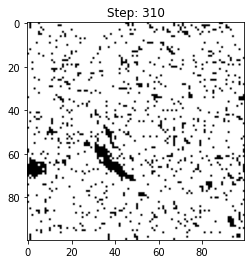

(True, -0.7738, -1.0, 200)

In [85]:
L = 100

T = 0.12
h = -0.1

check_Tooms_phase_stable(T, h , L, print_spins = True)
                            

In [106]:
L = 100

num_plot_points = 21

T_list = np.linspace(0, 0.3, num_plot_points)
h_list = np.linspace(0, 0.4, num_plot_points)

num_runs = 100





data_mat = np.zeros((num_plot_points, num_plot_points))

for T_ix, T in enumerate(T_list):
    
    print('Starting T', T_ix,'of', num_plot_points,':', T)
    
    for h_ix, h in enumerate(h_list):
        
        print('     h', h_ix,'of', num_plot_points,':', h)
        
        num_plus = 0
        num_minus = 0
        
        for _ in range(num_runs):
            
            in_phase, avg_spin, phase_sign, termalization_time = check_Tooms_phase_stable(T, h, L)

            if in_phase:
                if phase_sign>0:
                    num_plus += 1
                else:
                    num_minus += 1           
                
        data_mat[T_ix, h_ix] = 2*min(num_plus, num_minus) / num_runs

        
with open(os.path.join(SavingFolder, 'ToomsRule_PhaseTests_L'+str(L)+\
                         '_numruns'+ str(num_runs)+'.pickle'                 
                        ) , 'wb') as file:

    pickle.dump([T_list, h_list, data_mat], file)                    

Starting T 0 of 21 : 0.0
     h 0 of 21 : 0.0
     h 1 of 21 : 0.02
     h 2 of 21 : 0.04
     h 3 of 21 : 0.06
     h 4 of 21 : 0.08
     h 5 of 21 : 0.1
     h 6 of 21 : 0.12
     h 7 of 21 : 0.14
     h 8 of 21 : 0.16
     h 9 of 21 : 0.18
     h 10 of 21 : 0.2
     h 11 of 21 : 0.22
     h 12 of 21 : 0.24
     h 13 of 21 : 0.26
     h 14 of 21 : 0.28
     h 15 of 21 : 0.3
     h 16 of 21 : 0.32
     h 17 of 21 : 0.34
     h 18 of 21 : 0.36
     h 19 of 21 : 0.38
     h 20 of 21 : 0.4
Starting T 1 of 21 : 0.015
     h 0 of 21 : 0.0
     h 1 of 21 : 0.02
     h 2 of 21 : 0.04
     h 3 of 21 : 0.06
     h 4 of 21 : 0.08
     h 5 of 21 : 0.1
     h 6 of 21 : 0.12
     h 7 of 21 : 0.14
     h 8 of 21 : 0.16
     h 9 of 21 : 0.18
     h 10 of 21 : 0.2
     h 11 of 21 : 0.22
     h 12 of 21 : 0.24
     h 13 of 21 : 0.26
     h 14 of 21 : 0.28
     h 15 of 21 : 0.3
     h 16 of 21 : 0.32
     h 17 of 21 : 0.34
     h 18 of 21 : 0.36
     h 19 of 21 : 0.38
     h 20 of 21 : 0.4
Starting T 2

     h 11 of 21 : 0.22
     h 12 of 21 : 0.24
     h 13 of 21 : 0.26
     h 14 of 21 : 0.28
     h 15 of 21 : 0.3
     h 16 of 21 : 0.32
     h 17 of 21 : 0.34
     h 18 of 21 : 0.36
     h 19 of 21 : 0.38
     h 20 of 21 : 0.4
Starting T 17 of 21 : 0.255
     h 0 of 21 : 0.0
     h 1 of 21 : 0.02
     h 2 of 21 : 0.04
     h 3 of 21 : 0.06
     h 4 of 21 : 0.08
     h 5 of 21 : 0.1
     h 6 of 21 : 0.12
     h 7 of 21 : 0.14
     h 8 of 21 : 0.16
     h 9 of 21 : 0.18
     h 10 of 21 : 0.2
     h 11 of 21 : 0.22
     h 12 of 21 : 0.24
     h 13 of 21 : 0.26
     h 14 of 21 : 0.28
     h 15 of 21 : 0.3
     h 16 of 21 : 0.32
     h 17 of 21 : 0.34
     h 18 of 21 : 0.36
     h 19 of 21 : 0.38
     h 20 of 21 : 0.4
Starting T 18 of 21 : 0.27
     h 0 of 21 : 0.0
     h 1 of 21 : 0.02
     h 2 of 21 : 0.04
     h 3 of 21 : 0.06
     h 4 of 21 : 0.08
     h 5 of 21 : 0.1
     h 6 of 21 : 0.12
     h 7 of 21 : 0.14
     h 8 of 21 : 0.16
     h 9 of 21 : 0.18
     h 10 of 21 : 0.2
     h 11

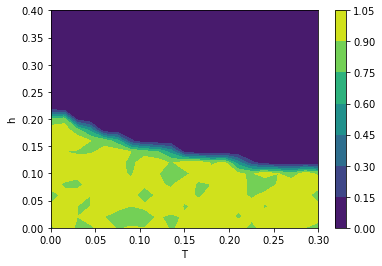

In [107]:
fig, ax = plt.subplots()
# im = ax.imshow(data_mat, interpolation='bilinear', origin='lower',
#                cmap=cm.gray, extent=(-3, 3, -2, 2))

X, Y = np.meshgrid(T_list, h_list)
cp = ax.contourf(X, Y, data_mat)
fig.colorbar(cp) # Add a colorbar to a plot

ax.set_xlabel('T')
ax.set_ylabel('h')
plt.show()

# Others

In [2]:
def site_ix_from_coords(coords, L):
    coords_a = np.array(coords)
    if np.any(coords_a > (L - 1)) or np.any(coords_a < 0):
        raise ValueError('All coordinates need to be less than the size L')
    temp_ix = 0
    for dim_ix, coord_val in enumerate(coords):
        if coord_val > 0:
            temp_ix += coord_val * (L ** dim_ix)
    return temp_ix


def coords_from_site_ix(site_ix, L, num_dims=2):
    if site_ix > (L ** num_dims - 1):
        raise ValueError('stab_ix need to be less than L^num_dims-1')
    return np.array([int(site_ix / (L ** dim_ix)) % L for dim_ix in range(num_dims)])



In [3]:
num_dims = 2

L = 10

spins = np.